<a href="https://colab.research.google.com/github/EG-L/kaggle/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/iris/archive.zip

Archive:  /content/drive/MyDrive/iris/archive.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [151]:
import pandas as pd
import numpy as np

In [152]:
df = pd.read_csv('Iris.csv')

In [153]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [154]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [155]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [156]:
np.unique(df['Species'],return_counts=True)
#다중 분류 마지막 활성화 계수 softmax

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
le = LabelEncoder()

In [159]:
df['Species'] = le.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [160]:
X = df.drop(['Id','Species'],axis=1)
y = le.fit_transform(df['Species'])

In [161]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [162]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [163]:
print(X_train.shape,y_train.shape)

(112, 4) (112,)


In [164]:
print(X_test.shape,y_test.shape)

(38, 4) (38,)


In [165]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(4,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [166]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 51        
Total params: 2,979
Trainable params: 2,979
Non-trainable params: 0
_________________________________________________________________


In [167]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
4/4 [==============================] - 1s 59ms/step - loss: 1.1170 - accuracy: 0.3482 - val_loss: 1.0823 - val_accuracy: 0.2895
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 1.0493 - accuracy: 0.3482 - val_loss: 1.0222 - val_accuracy: 0.2895
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.9968 - accuracy: 0.4732 - val_loss: 0.9582 - val_accuracy: 0.6842
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.9551 - accuracy: 0.6607 - val_loss: 0.9010 - val_accuracy: 0.6842
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.9069 - accuracy: 0.6607 - val_loss: 0.8517 - val_accuracy: 0.6842
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8657 - accuracy: 0.6607 - val_loss: 0.8131 - val_accuracy: 0.6842
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8317 - accuracy: 0.6607 - val_loss: 0.7705 - val_accuracy: 0.6842
Epoch 8/50
4/4 [=============

In [168]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [169]:
import matplotlib.pyplot as plt

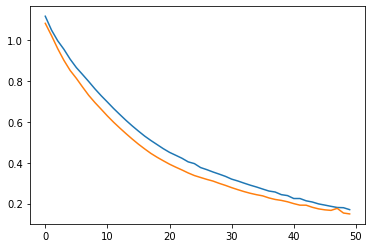

In [170]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

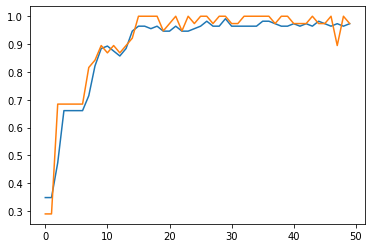

In [171]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [172]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.1494 - accuracy: 0.9737


[0.1494281142950058, 0.9736841917037964]